<a href="https://colab.research.google.com/github/Vishu31k/IML-Project/blob/main/SENTIMENT_ANALYSIS_WITH_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
                                              review  sentiment
0  I absolutely love this product! It works perfe...          1
1  Terrible experience, the product broke after o...          0
2         Good value for money, highly recommend it.          1
3  Not satisfied with the quality, very disappoin...          0
4           Excellent service and fantastic quality!          1

Test Set Accuracy: 0.25

Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.50      0.40         2
    Positive       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



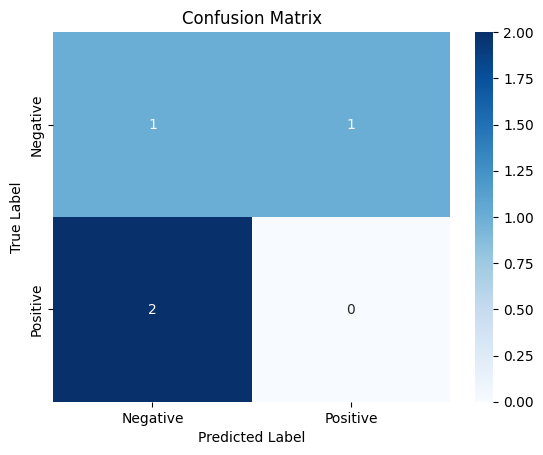

In [ ]:
# Task 2: Sentiment Analysis Using TF-IDF and Logistic Regression (Improved)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Expanded sample dataset (balanced positive and negative reviews)
data = {
    'review': [
        "I absolutely love this product! It works perfectly.",
        "Terrible experience, the product broke after one use.",
        "Good value for money, highly recommend it.",
        "Not satisfied with the quality, very disappointing.",
        "Excellent service and fantastic quality!",
        "Worst purchase I have ever made.",
        "Pretty decent product for the price.",
        "I am unhappy, the item arrived damaged.",
        "Loved it! Will buy again.",
        "The product did not meet my expectations.",
        "I’m very pleased with this purchase.",
        "Bad quality and awful customer support.",
        "Highly satisfied, will order again!",
        "Disappointed. Not what I expected.",
        "Great product, works like a charm.",
        "Terrible! Completely useless item.",
        "I recommend this to all my friends.",
        "It stopped working after a week.",
        "Five stars! Excellent in every way.",
        "Regret buying this product."
    ],
    # Corresponding sentiments: 1 = positive, 0 = negative
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Display sample data
print("Sample Data:")
print(df.head())

# Separate features and labels
X = df['review']
y = df['sentiment']

# Use stratified split to maintain class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize TF-IDF Vectorizer (remove common English stopwords)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit on training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
